In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Downloading the asset details

stocks = ['RELIANCE.NS','LT.NS','TATASTEEL.NS','NTPC.NS','SBIN.NS',
          'VEDL.NS','SUZLON.NS','INDHOTEL.NS','BLUESTARCO.NS','BSOFT.NS']
data = yf.download(stocks, start = '2024-01-01', end = '2024-12-31')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


In [3]:
data

Ticker,BLUESTARCO.NS,BSOFT.NS,INDHOTEL.NS,LT.NS,NTPC.NS,RELIANCE.NS,SBIN.NS,SUZLON.NS,TATASTEEL.NS,VEDL.NS
Date,,,,,,,,,,
2024-01-01,944.882996,695.278137,434.792084,3497.952881,300.148621,1290.744263,630.772156,38.500000,137.087997,233.829956
2024-01-02,947.173523,680.478760,436.885803,3411.284424,296.514832,1301.432983,628.903503,38.250000,136.842926,234.739273
2024-01-03,937.862122,678.845276,450.096069,3413.516846,296.708679,1287.281006,632.837524,37.799999,132.676865,239.876877
2024-01-04,931.787354,680.577698,461.411987,3431.723633,307.270813,1293.933350,632.149048,38.700001,131.598587,242.013779
2024-01-05,940.102844,707.157288,454.682251,3494.430664,305.187469,1299.439697,631.362305,40.599998,131.010437,241.740967
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2005.800049,573.700012,859.400024,3640.500000,331.067566,1222.300049,821.150024,63.860001,141.710007,464.700012
2024-12-24,1983.199951,579.700012,862.650024,3639.750000,332.704773,1222.750000,812.049988,64.870003,140.380005,462.100006
2024-12-26,2039.199951,570.250000,868.299988,3629.500000,332.059814,1216.550049,812.450012,64.339996,140.360001,460.450012


In [14]:
# Importing Python Portfolio Optimization Module

from pypfopt import expected_returns
from pypfopt import HRPOpt

In [15]:
rets = expected_returns.returns_from_prices(data)
rets

Ticker,BLUESTARCO.NS,BSOFT.NS,INDHOTEL.NS,LT.NS,NTPC.NS,RELIANCE.NS,SBIN.NS,SUZLON.NS,TATASTEEL.NS,VEDL.NS
Date,,,,,,,,,,
2024-01-02,0.002424,-0.021286,0.004815,-0.024777,-0.012107,0.008281,-0.002962,-0.006494,-0.001788,0.003889
2024-01-03,-0.009831,-0.002400,0.030237,0.000654,0.000654,-0.010874,0.006255,-0.011765,-0.030444,0.021886
2024-01-04,-0.006477,0.002552,0.025141,0.005334,0.035598,0.005168,-0.001088,0.023810,-0.008127,0.008908
2024-01-05,0.008924,0.039054,-0.014585,0.018273,-0.006780,0.004256,-0.001245,0.049096,-0.004469,-0.001127
2024-01-08,0.009110,-0.005669,-0.009648,-0.005906,0.004763,-0.007804,-0.023289,0.049261,-0.012346,-0.027835
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.014311,-0.005719,0.006205,0.002934,0.001200,0.014104,0.011269,-0.004210,0.007322,-0.008486
2024-12-24,-0.011267,0.010458,0.003782,-0.000206,0.004945,0.000368,-0.011082,0.015816,-0.009385,-0.005595
2024-12-26,0.028237,-0.016302,0.006550,-0.002816,-0.001939,-0.005070,0.000493,-0.008170,-0.000143,-0.003571


In [16]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('BLUESTARCO.NS', 0.10591),
             ('BSOFT.NS', 0.11121),
             ('INDHOTEL.NS', 0.09547),
             ('LT.NS', 0.10853),
             ('NTPC.NS', 0.05423),
             ('RELIANCE.NS', 0.2),
             ('SBIN.NS', 0.06334),
             ('SUZLON.NS', 0.07216),
             ('TATASTEEL.NS', 0.11073),
             ('VEDL.NS', 0.07842)])

<Axes: >

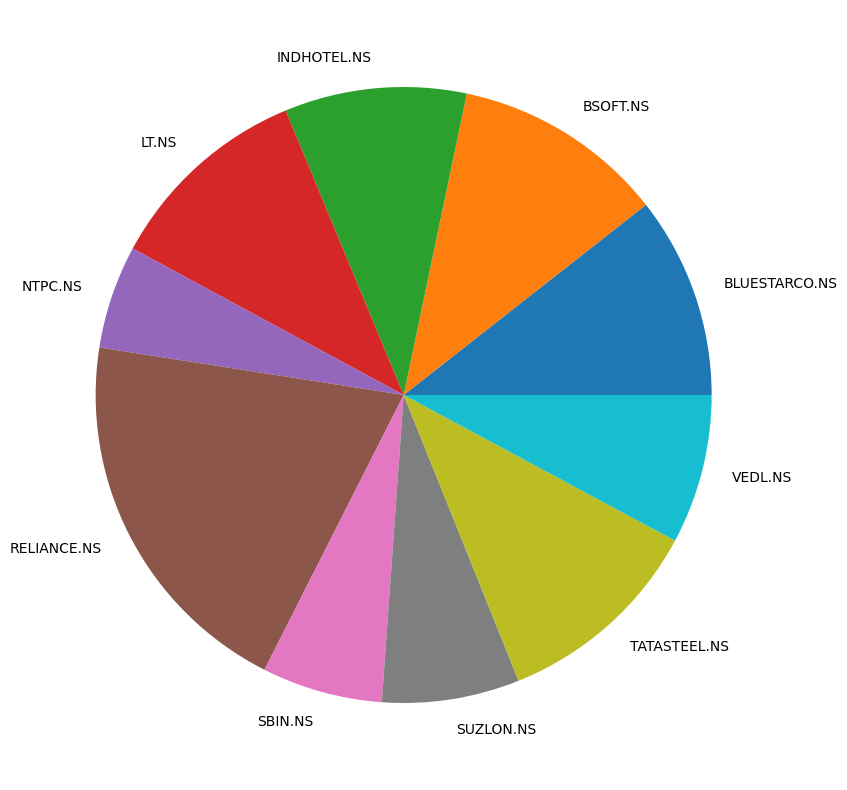

In [18]:
pd.Series(weights).plot.pie(figsize = (10,10))